In [1]:
# Import all necessary packages
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import os;
from sklearn.linear_model import LogisticRegression;
from sklearn.model_selection import train_test_split;

In [2]:
# Extract all the data from the csv files and dataframe them to a variable -

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
songs = pd.read_csv('songs.csv')
extra_info = pd.read_csv('song_extra_info.csv')
userData = pd.read_csv('members.csv')


In [3]:
# Get info on the train data
print("Please find the below data to be trained -")
train.info()

Please find the below data to be trained -
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                int64
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [4]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [5]:
print("Please find the below data to be tested -")
test.info()

Please find the below data to be tested -
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
id                    int64
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB


In [6]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [7]:
songs.head(15)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,465,光良 (Michael Wong),光良,彭資閔,3.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0


In [8]:
extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [9]:
userData.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [10]:
print("Song Stats: ");
songs_in_tnt = np.intersect1d(train['song_id'].unique(), test["song_id"].unique());
print(train['song_id'].nunique(), test['song_id'].nunique());
print((test['song_id'].nunique() - songs_in_tnt.shape[0]));
print((test['song_id'].nunique() - songs_in_tnt.shape[0]) / test['song_id'].nunique());

Song Stats: 
359966 224753
59873
0.2663946643648806


In [11]:
print("User details: ");
user_in_tnt = np.intersect1d(train['msno'].unique(), test['msno'].unique());
print(train['msno'].nunique(), test['msno'].nunique());
print((test['msno'].nunique() - user_in_tnt.shape[0]));
print((test['msno'].nunique() - user_in_tnt.shape[0]) / test['msno'].nunique())

User details: 
30755 25131
3648
0.14515936492777845


In [12]:
train_merged = train.merge(songs[['song_id', 'artist_name', 'genre_ids','language']], on='song_id')
test_merged = test.merge(songs[['song_id', 'artist_name', 'genre_ids','language']], on='song_id')
train_merged.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,artist_name,genre_ids,language
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,Bastille,359,52.0
1,e5Ezre9HPuPos+CXQXtmo32E/hHIZTMmo6jG3yRf6UA=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,my library,Local playlist more,local-playlist,1,Bastille,359,52.0
2,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0,Bastille,359,52.0
3,sSexP400TJOZRhx3JB+0s9cqrCnqrlV51B9njoKR1II=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,Online playlist more,online-playlist,0,Bastille,359,52.0
4,hKdGiUKHVqKkXGHLrc+EzdSW6q0ERAJ2Cs7/L1N0Ae4=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,discover,NaN,online-playlist,0,Bastille,359,52.0


In [13]:
print("Artist details: ");
artist_in_tnt = np.intersect1d(train_merged['artist_name'].unique(), test_merged['artist_name'].unique());
print(train_merged['artist_name'].nunique(), test_merged['artist_name'].nunique());
print((test_merged['artist_name'].nunique() - artist_in_tnt.shape[0]))
print((test_merged['artist_name'].nunique() - artist_in_tnt.shape[0]) / test_merged['artist_name'].nunique())

Artist details: 
40582 27563
5790
0.21006421652214927


In [14]:
print("Language details: ")
lang_in_tnt = np.intersect1d(train_merged['language'].unique(), test_merged['language'].unique());
print(train_merged['language'].nunique(), test_merged['language'].nunique());
print((test_merged['language'].nunique() - lang_in_tnt.shape[0]))
print((test_merged['language'].nunique() - lang_in_tnt.shape[0]) / test_merged['language'].nunique())

Language details: 
10 10
0
0.0


In [15]:
print("Genre Details: ")
genre_in_tnt = np.intersect1d(train_merged['genre_ids'].apply(str).unique(), test_merged['genre_ids'].apply(str).unique())
print(train_merged['genre_ids'].nunique(), test_merged['genre_ids'].nunique())
print((test_merged['genre_ids'].nunique() - genre_in_tnt.shape[0]))
print((test_merged['genre_ids'].nunique() - genre_in_tnt.shape[0]) / test_merged['genre_ids'].nunique())

Genre Details: 
572 501
35
0.06986027944111776


In [16]:
listen_log = train[['msno', 'song_id', 'target']].merge(songs, on="song_id");
listen_log_group = listen_log[['song_id', 'target']].groupby(['song_id']).agg(['mean', 'count']);
listen_log_group.head()

target      
                                               mean count
song_id                                                  
+++2AEoM0d8iZTdbnAjUm35bnGKGMXdZJSv4rrWK6JQ=    0.0     1
++/ACCkEN/+VtgrJxEqeRgRmV4y8pcarDJ9T/yRAi1E=    0.0     2
++/lJNswCU+za2pYB0cWIbGL5UzWIKtfweX20+GImZA=    0.0     3
++4/NK5qpbTZWln/6UmykB8cLfRTCCj8E36IKZVzBjM=    0.0     1
++4Ihbdp0juQ9ldp9DysOL1WTLHIiawg7cnBTn55I/k=    0.0     1

In [17]:
listen_log_group.reset_index(inplace = True)
listen_log_group.columns = list(map(''.join, listen_log_group.columns.values))
listen_log_group.columns = ['song_id', 'repeat_play_chance', 'plays']


In [18]:
# Merge song data with derived values
data_song = listen_log_group.merge(songs, on = 'song_id')
data_song['repeat_event'] = data_song['repeat_play_chance'] * data_song['plays']
data_song.head(10)

,song_id,repeat_play_chance,plays,song_length,genre_ids,artist_name,composer,lyricist,language,repeat_event
0,+++2AEoM0d8iZTdbnAjUm35bnGKGMXdZJSv4rrWK6JQ=,0.000000,1,223921,921,รวมศิลปิน,Chackkrit Muckkanaso,Tadakorn; Narongvit Techatanawat,45.0,0.0
1,++/ACCkEN/+VtgrJxEqeRgRmV4y8pcarDJ9T/yRAi1E=,0.000000,2,271302,465,Variété Française,NaN,NaN,52.0,0.0
2,++/lJNswCU+za2pYB0cWIbGL5UzWIKtfweX20+GImZA=,0.000000,3,221413,786|947,愛的音樂盒,NaN,NaN,-1.0,0.0
3,++4/NK5qpbTZWln/6UmykB8cLfRTCCj8E36IKZVzBjM=,0.000000,1,142471,465,It's Christmas Time,Arranged By| Felix Mendelssohn| Gordon Jenkins...,NaN,52.0,0.0
4,++4Ihbdp0juQ9ldp9DysOL1WTLHIiawg7cnBTn55I/k=,0.000000,1,169970,2122,Wynton Kelly Trio,NaN,NaN,-1.0,0.0
5,++6SwJ+aXGV4LLqJmgEogoeEC0DxEdyus0MzD3iuveA=,0.000000,2,230086,465,北原山貓,NaN,NaN,3.0,0.0
6,++732ZgaVBo177j83D3Iht3ZeHUctfXg/y47RKvmc3k=,0.000000,1,228362,465,Various Artists,Jack White,Jon Athan/Ian Gari VCowtan,52.0,0.0
7,++7GdTgp8zbQLYOki7hVPEOHpu+KLZClsGrGiEuL2uI=,0.407407,54,267075,458,袁詠琳 (Cindy Yen),Cindy袁詠琳,賴雅妍| 黃俊郎,3.0,22.0
8,++8KD5dwLpXTteprbInWnhBQRkYQjmQPiFQLS3bVRLM=,0.000000,2,122416,958,Simone Kermes,Antonio Vivaldi,NaN,-1.0,0.0
9,++8TsjXZyHVfns0LTmZ+EdTlVY29HQSBxhzRrlSsAqk=,1.000000,1,304405,2022,Mago de Oz,NaN,NaN,52.0,1.0


In [19]:
# what is the maximum number of times a song has been played?

data_song['plays'].max()

13973

In [20]:
data_song[data_song['plays']==3].head()

,song_id,repeat_play_chance,plays,song_length,genre_ids,artist_name,composer,lyricist,language,repeat_event
2,++/lJNswCU+za2pYB0cWIbGL5UzWIKtfweX20+GImZA=,0.000000,3,221413,786|947,愛的音樂盒,NaN,NaN,-1.0,0.0
18,++CnoGMowrYqDI2eQM3aNJMIsxPNx1LD7u8ShTGwAQQ=,0.666667,3,214691,465,Kenny Rogers,NaN,NaN,52.0,2.0
28,++IrpeciSQ6NWOp78CLvSLjcJVwBecNHnYzvOrxFAPE=,0.666667,3,269281,465,Rod Stewart,NaN,NaN,52.0,2.0
41,++OAO4xg27nDnqoaaxDZJK1sCG2VsesZTz+uR19iiKg=,0.666667,3,291224,465,Unsuku Ke (桂銀淑),Keisuke Hama,Yu Aku,17.0,2.0
56,++X36LmFngSdYDFPNeMi4D08iYuVmZuBymO4pQUqPkg=,0.000000,3,256522,864|857|850|843,ZAQ,ZAQ,ZAQ,17.0,0.0


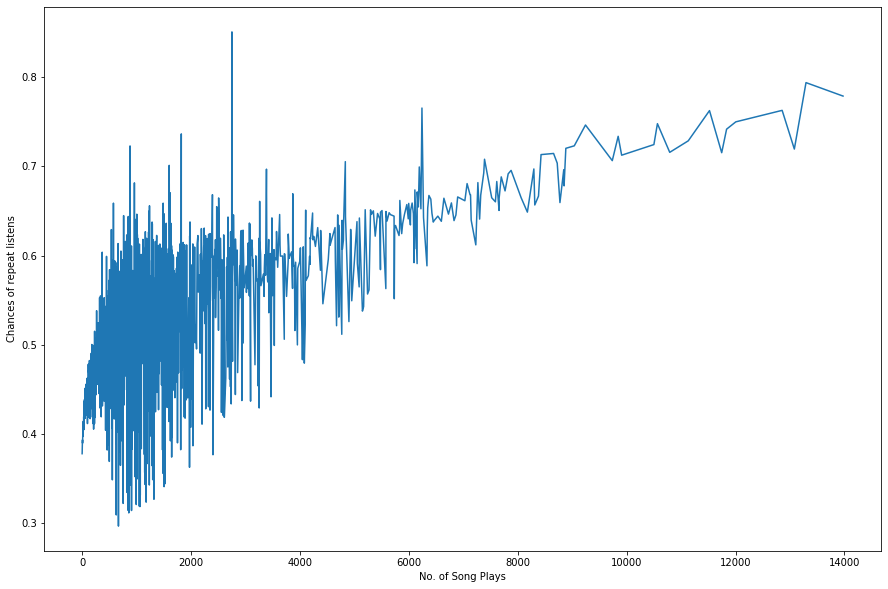

In [21]:
# How does a songs popularity (number of plays) affect the chance of it being played repeatedly?
x_plays = [];
y_repeat_chance = [];

for i in range(1, data_song['plays'].max()+1):
    plays_i = data_song[data_song['plays']==i];
    count = plays_i['plays'].sum();
    if count > 0:
        x_plays.append(i);
        y_repeat_chance.append(plays_i['repeat_event'].sum() / count);

plt.figure(figsize = (15,10))
plt.xlabel('No. of Song Plays')
plt.ylabel('Chances of repeat listens')
plt.plot(x_plays, y_repeat_chance)
plt.show()
# High noise level in the 2000s range but there is some correlation between No. of plays and chances of the same being played
# back.

We can see correlation with the given two columns but its noisy due to not very large number of plays there in the given data.

In [22]:
# find out more about the  genres, composers and lyricists (or, more specifically, their numbers)

def count_vals(x):
    if type(x) != str:
        return 1;
    else :
        return 1+x.count('|')

data_song['no_of_genres'] = data_song['genre_ids'].apply(count_vals)
data_song['no_of_composers'] = data_song['composer'].apply(count_vals)
data_song['no_of_lyrics'] = data_song['lyricist'].apply(count_vals)

print(data_song['no_of_genres'].max(), data_song['no_of_composers'].max(), data_song['no_of_lyrics'].max())

# Only 51 composer, 23 Lyricist and 8 genre

8 51 23


In [23]:
data_song.head(10)

,song_id,repeat_play_chance,plays,song_length,genre_ids,artist_name,composer,lyricist,language,repeat_event,no_of_genres,no_of_composers,no_of_lyrics
0,+++2AEoM0d8iZTdbnAjUm35bnGKGMXdZJSv4rrWK6JQ=,0.000000,1,223921,921,รวมศิลปิน,Chackkrit Muckkanaso,Tadakorn; Narongvit Techatanawat,45.0,0.0,1,1,1
1,++/ACCkEN/+VtgrJxEqeRgRmV4y8pcarDJ9T/yRAi1E=,0.000000,2,271302,465,Variété Française,NaN,NaN,52.0,0.0,1,1,1
2,++/lJNswCU+za2pYB0cWIbGL5UzWIKtfweX20+GImZA=,0.000000,3,221413,786|947,愛的音樂盒,NaN,NaN,-1.0,0.0,2,1,1
3,++4/NK5qpbTZWln/6UmykB8cLfRTCCj8E36IKZVzBjM=,0.000000,1,142471,465,It's Christmas Time,Arranged By| Felix Mendelssohn| Gordon Jenkins...,NaN,52.0,0.0,1,4,1
4,++4Ihbdp0juQ9ldp9DysOL1WTLHIiawg7cnBTn55I/k=,0.000000,1,169970,2122,Wynton Kelly Trio,NaN,NaN,-1.0,0.0,1,1,1
5,++6SwJ+aXGV4LLqJmgEogoeEC0DxEdyus0MzD3iuveA=,0.000000,2,230086,465,北原山貓,NaN,NaN,3.0,0.0,1,1,1
6,++732ZgaVBo177j83D3Iht3ZeHUctfXg/y47RKvmc3k=,0.000000,1,228362,465,Various Artists,Jack White,Jon Athan/Ian Gari VCowtan,52.0,0.0,1,1,1
7,++7GdTgp8zbQLYOki7hVPEOHpu+KLZClsGrGiEuL2uI=,0.407407,54,267075,458,袁詠琳 (Cindy Yen),Cindy袁詠琳,賴雅妍| 黃俊郎,3.0,22.0,1,1,2
8,++8KD5dwLpXTteprbInWnhBQRkYQjmQPiFQLS3bVRLM=,0.000000,2,122416,958,Simone Kermes,Antonio Vivaldi,NaN,-1.0,0.0,1,1,1
9,++8TsjXZyHVfns0LTmZ+EdTlVY29HQSBxhzRrlSsAqk=,1.000000,1,304405,2022,Mago de Oz,NaN,NaN,52.0,1.0,1,1,1


We are dealing with 51 composers and 23 lyricist in this aforementioned dataset.

In [24]:
max_comp_songs = data_song.loc[data_song['no_of_composers'] == data_song['no_of_composers'].max()];
max_lyr_songs = data_song.loc[data_song['no_of_lyrics'] == data_song['no_of_lyrics'].max()];
pd.set_option('display.max_colwidth', 200);
print(max_comp_songs[['artist_name', 'composer', 'lyricist', 'no_of_composers', 'no_of_lyrics']])
print(max_lyr_songs[['artist_name', 'composer', 'lyricist', 'no_of_composers', 'no_of_lyrics']])

       artist_name  \
309485      SHINee   

                                                                                                                                                                                                       composer  \
309485  Korean Lyrics by Kim| Jong Hyun (12.5%) Harvey Mason| Jr. / Steven,,31\nw1zMqFE+5ynBzZil7EKEh2HvNHDLNvnlQ+al7cRBqjw=,281913,465,Madonna,,,52\nRcGEZpOfi+Y9D7JIIcUtyGP2MddfnhVzhfKKhEAJAtM=,210372,20...   

                                      lyricist  no_of_composers  no_of_lyrics  
309485  Andreas "Quiz" Romdhane| Savan Kotecha               51             2  
       artist_name  \
106071      Coolio   

                                                                                                                                                                                                       composer  \
106071  A. Ivey| A. Jones| Bar-keys| C. Allen| C. Frantz| D. Aldridge| F. Thompson| H. Henderson| H. Straughter| I. 

There is a lot of rubbish data in Composer field -

In [25]:
x_genre = list(range(1, data_song['no_of_genres'].max() + 1))
x_composers = list(range(1, data_song['no_of_composers'].max() + 1))
x_lyricist = list(range(1, data_song['no_of_lyrics'].max() + 1))


y_genres = [data_song[data_song['no_of_genres'] == x].shape[0] for x in x_genre]
y_composers = [data_song[data_song['no_of_composers'] == x].shape[0] for x in x_composers]
y_lyricists = [data_song[data_song['no_of_lyrics'] == x].shape[0] for x in x_lyricist]

# we should get rid of the zero value for the no. of composers and no. of lyricists -
empty_ids = [i for i, y in enumerate(y_composers) if y == 0]
x_composers_fixed = [x_composers[i] for i in range(0,data_song['no_of_composers'].max()) if i not in empty_ids]
y_composers_fixed = [y_composers[i-1] for i in x_composers_fixed]

empty_ids1 = [i for i, y in enumerate(y_lyricists) if y == 0]
x_lyricists_fixed = [x_lyricist[i] for i in range(0,data_song['no_of_lyrics'].max()) if i not in empty_ids]
y_lyricists_fixed = [y_lyricists[i-1] for i in x_lyricists_fixed]

y_repeat_chance_g = []
y_plays_g = []

for i in range(1, data_song['no_of_genres'].max() + 1):
    genres_i = data_song[data_song['no_of_genres']==i];
    count = genres_i['plays'].sum()
    y_repeat_chance_g.append(genres_i['repeat_event'].sum() / count);
    y_plays_g.append(count)

y_repeat_chance_c = []
y_plays_c = []

for i in x_composers_fixed:
    composers_i = data_song[data_song['no_of_composers'] == i]
    count = composers_i['plays'].sum()
    y_repeat_chance_c.append(composers_i['repeat_event'].sum() / count)
    y_plays_g.append(count)

y_repeat_chance_l = []
y_plays_l = []

for i in y_lyricists_fixed:
    lyricists_i = data_song[data_song['no_of_lyrics'] == i]
    count = lyricists_i['plays'].sum()
    y_repeat_chance_l.append(lyricists_i['repeat_event'].sum() / count)
    y_plays_l.append(count)
# pretty long


print(y_plays_g)

D:\My_En-Soft\Anaconda\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars


[7036987, 298160, 33682, 6096, 2120, 33, 13, 213, 5890609, 493740, 395390, 212706, 169346, 109038, 46545, 15358, 15966, 8470, 12799, 2119, 455, 870, 239, 913, 1229, 376, 380, 730, 15, 1, 9, 1]


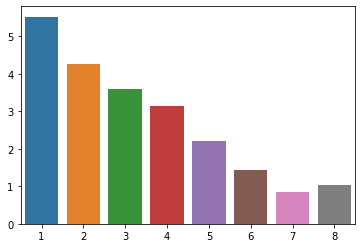

In [26]:
fig = plt.figure()
ax331 = plt.subplot(1,1,1)
sns.barplot(x=x_genre,y=np.log10(y_genres))

In [27]:
ax331.set_ylabel('log10(# of songs)')
# ax334 = plt.subplot(3,3,4)
sns.barplot(x=x_genre,y=np.log10(y_plays_g))


ValueError: Grouper for '1' not 1-dimensional

Text(0, 0.5, 'chance of repeated listen')

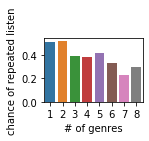

In [28]:
# ax334.set_ylabel('log10(# of plays)')
ax337 = plt.subplot(3,3,7)
sns.barplot(x=x_genre,y=y_repeat_chance_g)
ax337.set_xlabel('# of genres')
ax337.set_ylabel('chance of repeated listen')

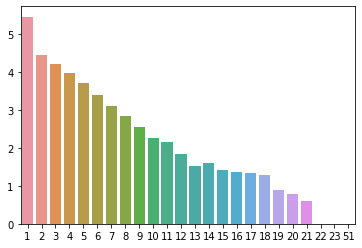

In [29]:
# plt.subplot(3,3,2)
sns.barplot(x=x_composers_fixed,y=np.log10(y_composers_fixed))

In [30]:
# plt.subplot(3,3,5)
sns.barplot(x=x_composers_fixed,y=np.log10(y_plays_c))

KeyError: 1

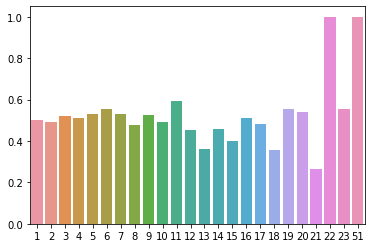

In [31]:
# ax338 = plt.subplot(3,3,8)
sns.barplot(x=x_composers_fixed,y=y_repeat_chance_c)

D:\My_En-Soft\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


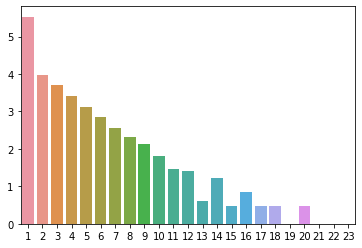

In [32]:
# ax338.set_xlabel('# of composers')
# plt.subplot(3,3,3)
sns.barplot(x=x_lyricists_fixed,y=np.log10(y_lyricists_fixed))


D:\My_En-Soft\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


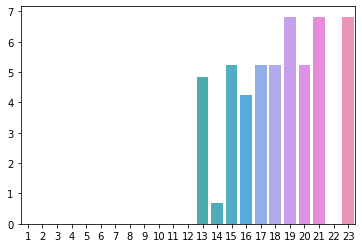

In [33]:
# plt.subplot(3,3,6)
sns.barplot(x=x_lyricists_fixed,y=np.log10(y_plays_l))

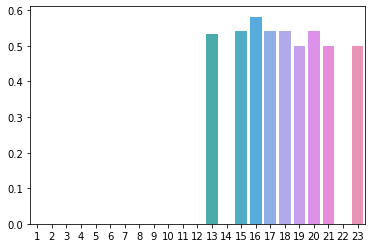

In [34]:
# ax339 = plt.subplot(3,3,9)
sns.barplot(x=x_lyricists_fixed,y=y_repeat_chance_l)
# ax339.set_xlabel('# of lyricists')

So it seems there's no real effect of the number of composers and lyricists on the song's repeat listens; the number of genres _____. 

There's more than a 1000 songs with 5 lyricists (and there's a thousand of songs with 7 composers). 

Those songs with 15+ composers seem (relatively) popular – nearly a 1000 plays for less than 10 songs (looking at the songs with 20 composers).
The same for the song with 20 lyricists. (Actually, the data on composers/lyricists seems a bit noisy - there are some weirdly placed delimiters here and there; but the overall impression is that it has no influence on the chance of a repeated listen anyway). 

What about the song's language, how does that influence a songs plays and chance of repeated listens?

In [35]:
languages = data_song['language'].unique()
print(languages.shape[0])

language_count = []
language_plays = []
language_repeat_chance = []

for l in languages:
    if not np.isnan(l):
        songs_with_language = data_song[data_song['language']==l]
        count = songs_with_language['plays'].sum()
        language_repeat_chance.append(songs_with_language['repeat_event'].sum() / count)
        language_count.append(songs_with_language.shape[0])
        language_plays.append(count)
    else:
        songs_with_language = data_song[pd.isnull(data_song['language'])]
        count = songs_with_language['plays'].sum()
        language_repeat_chance.append(songs_with_language['repeat_event'].sum() / count)
        language_count.append(songs_with_language.shape[0])
        language_plays.append(count)
        
languages[10] = -100

11


Text(0.5, 0, 'Song language')

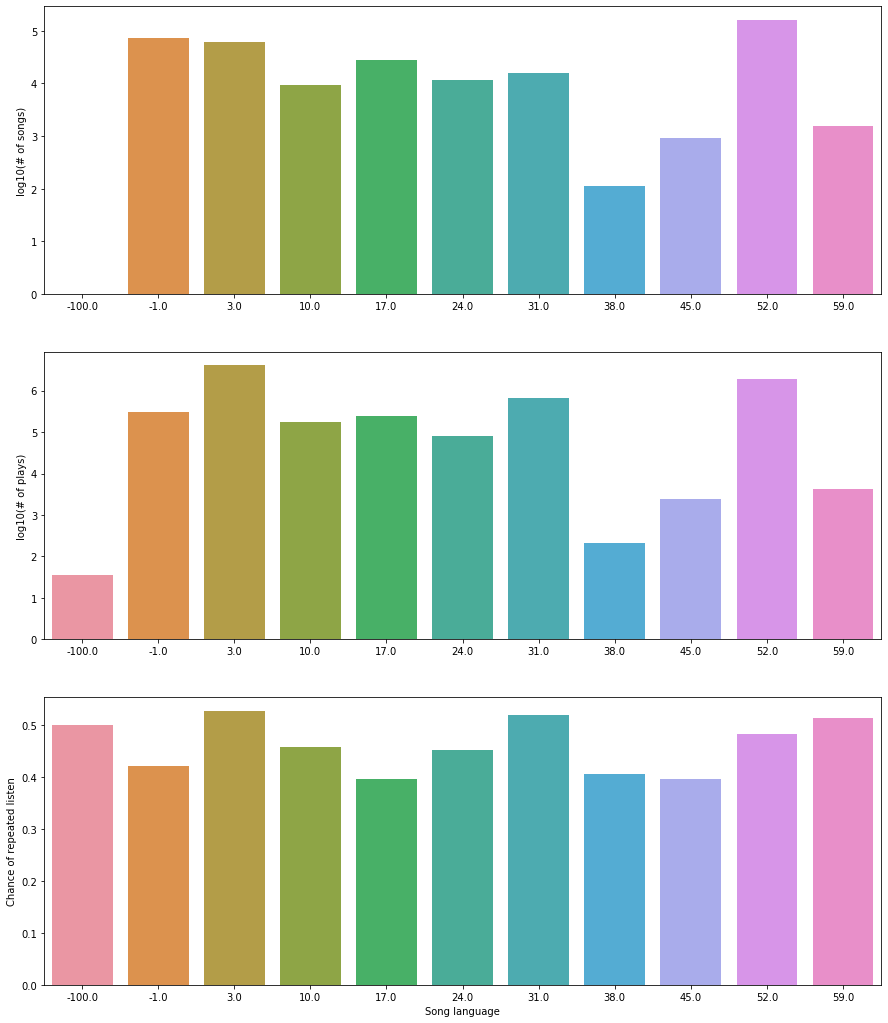

In [36]:
fig = plt.figure(figsize=(15, 18)) 

ax1 = plt.subplot(3,1,1)
sns.barplot(x=languages,y=np.log10(language_count))
ax1.set_ylabel('log10(# of songs)')
ax2 = plt.subplot(3,1,2)
sns.barplot(x=languages,y=np.log10(language_plays))
ax2.set_ylabel('log10(# of plays)')
ax3 = plt.subplot(3,1,3)
sns.barplot(x=languages,y=language_repeat_chance)
ax3.set_ylabel('Chance of repeated listen')
ax3.set_xlabel('Song language')

Seems like languages "-1", "17" and "45" lead to a lower chance of repeated listens (language "38" does that too, but there are only 100 songs in it, which in total haven't received a lot of plays too).

Let's look at the song length.

In [37]:
min_song_length_sec = data_song['song_length'].min() / 1000  # the data is in msec
max_song_length_sec = data_song['song_length'].max() / 1000
print(min_song_length_sec, max_song_length_sec)

1.393 10851.706


1 second song is there and a 3 hr song is there...
How are the songs distributed length-wise?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB3016EDD8>]],
      dtype=object)

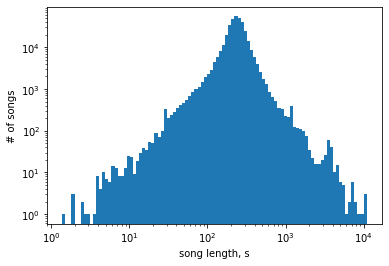

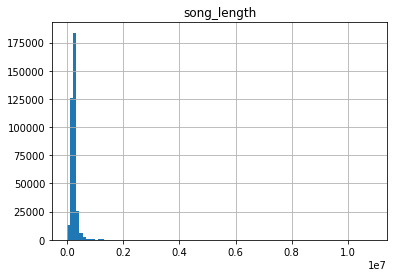

In [38]:
# plt.figure()
length_bins = np.logspace(np.log10(min_song_length_sec),np.log10(max_song_length_sec+1),100)
sns.distplot(data_song['song_length']/1000, bins=length_bins, kde=False,
             hist_kws={"alpha": 1})
plt.xlabel('song length, s')
plt.ylabel('# of songs')
plt.yscale('log')
plt.xscale('log')
data_song.hist(column='song_length', bins=100)

Text(0, 0.5, 'Chance of repeated listen')

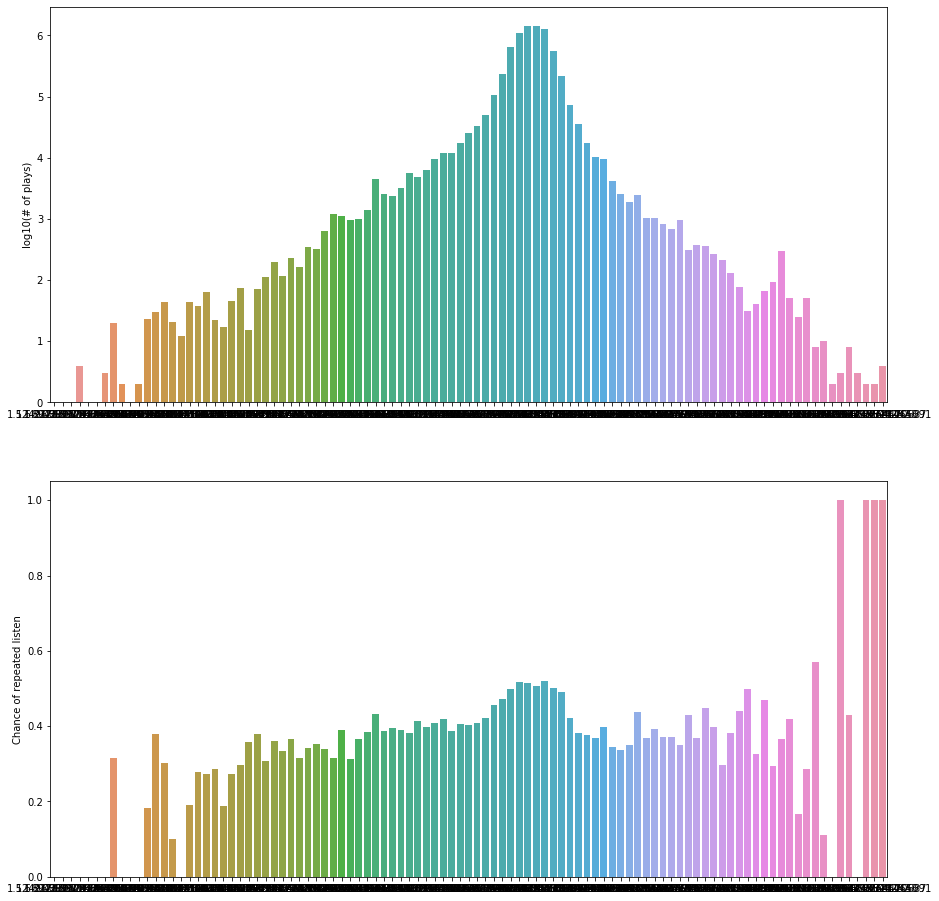

In [39]:
time_labels = list(range(length_bins.shape[0]-1))
data_song['time_cuts'] = pd.cut(data_song['song_length']/1000,
                                bins=length_bins, labels=time_labels)

y_repeat_chance_tc = []
y_plays_tc = []
y_rel_plays = []
for i in time_labels:
    timecut_i = data_song[data_song['time_cuts']==i]
    count = timecut_i['plays'].sum()
    y_plays_tc.append(count)
    if count != 0:
        y_repeat_chance_tc.append(timecut_i['repeat_event'].sum() / count)
        y_rel_plays.append(count / timecut_i.shape[0])
    else:
        y_repeat_chance_tc.append(0)
        y_rel_plays.append(0)
    
fig = plt.figure(figsize=(15, 16)) 

y_plays_tc = [yptc + 1 for yptc in y_plays_tc]  # otherwise we'll get errors when we take the log

ax211 = plt.subplot(2,1,1)
sns.barplot(x=length_bins[time_labels],y=np.log10(y_plays_tc))
ax211.set_ylabel('log10(# of plays)')

ax212 = plt.subplot(2,1,2)
sns.barplot(x=length_bins[time_labels],y=y_repeat_chance_tc)
ax212.set_ylabel('Chance of repeated listen')


Shorter-than average songs get lower chances of repeated listens, while those few very long songs are always repeated (each person that has listened to that 3-hour Jason Stephenson track has listened to it again). 

The next question – how does an artist's number of tracks and plays influence the chance of repeated listens? 

Text(0, 0.5, '# of plays / # of tracks')

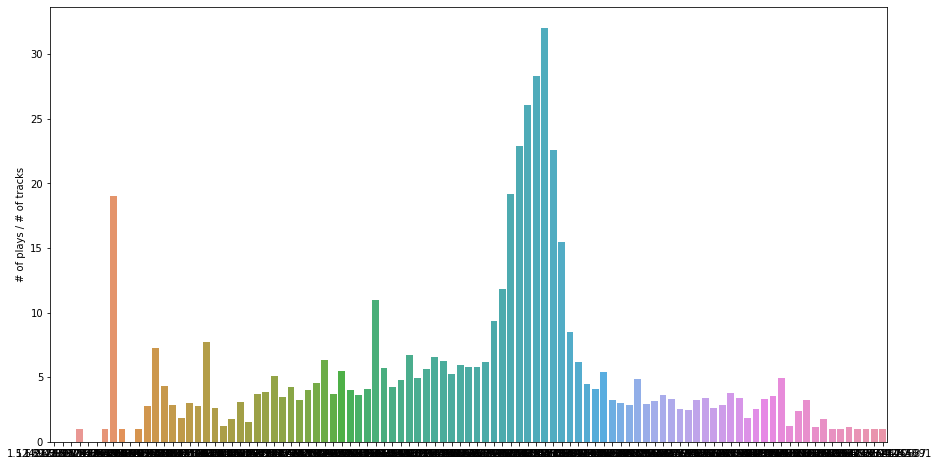

In [40]:
fig = plt.figure(figsize=(15, 8)) 

ax111 = plt.subplot(1,1,1)
sns.barplot(x=length_bins[time_labels],y=y_rel_plays)
ax111.set_ylabel('# of plays / # of tracks')

Various Artists       17080
証聲音樂圖書館 ECHO MUSIC     3997
貴族精選                   1211
霹靂布袋戲劇集原聲帶              937
Name: artist_name, dtype: int64


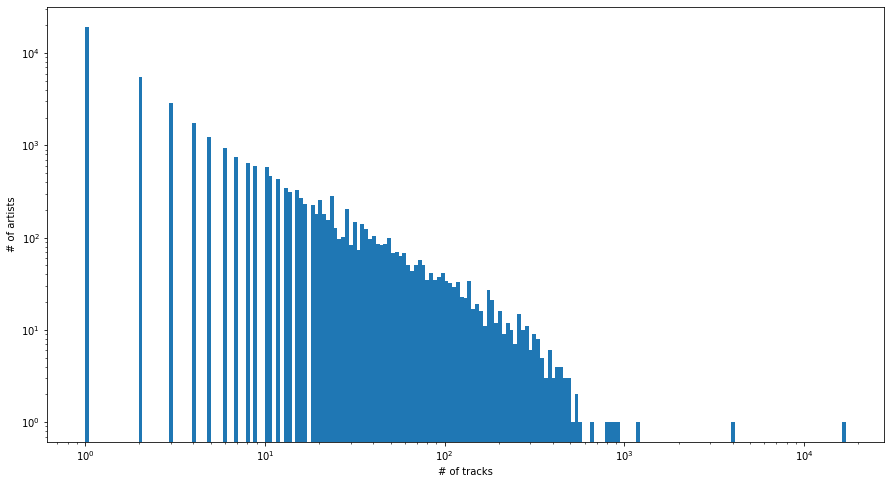

In [41]:
max_tracks = data_song['artist_name'].value_counts().max()
print(data_song['artist_name'].value_counts()[:4])

plt.figure(figsize=(15,8))
track_bins = np.logspace(0,np.log10(max_tracks+1),200)
# track_bins = np.linspace(1,max_tracks+1,100)
sns.distplot(data_song['artist_name'].value_counts(), bins=track_bins, kde=False,
             hist_kws={"alpha": 1})
plt.xlabel('# of tracks')
plt.ylabel('# of artists')
plt.yscale('log')
plt.xscale('log')

A lot of artists with just one track (actually, with one track that has had at least one listen

1 303616


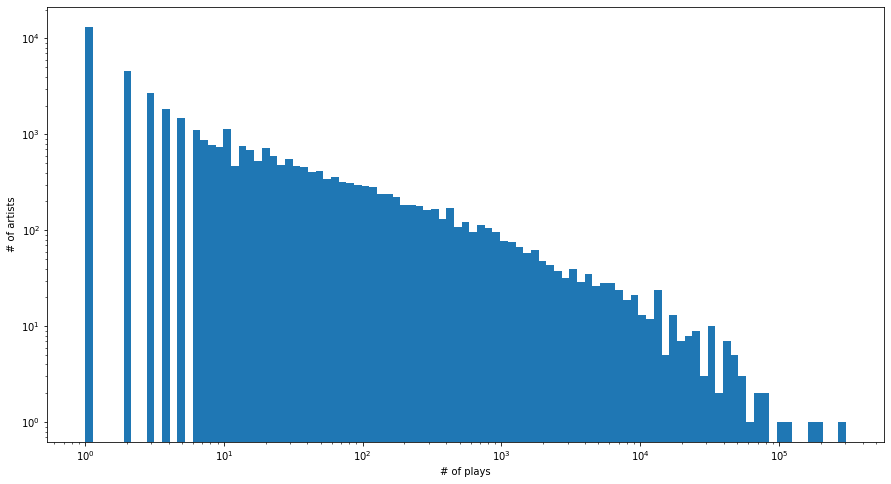

In [42]:
artist_groupby = data_song[['artist_name', 'plays']].groupby(['artist_name'])
artist_plays = artist_groupby['plays'].agg(['sum'])
artist_plays.reset_index(inplace=True)

# print(artist_groupby.first())

min_plays = artist_plays['sum'].min()
max_plays = artist_plays['sum'].max()
print(min_plays, max_plays)

plt.figure(figsize=(15,8))
play_bins = np.logspace(np.log10(min_plays),np.log10(max_plays+1),100)
# track_bins = np.linspace(1,max_tracks+1,100)
sns.distplot(artist_plays['sum'], bins=play_bins, kde=False,
             hist_kws={"alpha": 1})
plt.xlabel('# of plays')
plt.ylabel('# of artists')
plt.yscale('log')
plt.xscale('log')

The number of plays and number of tracks is an artist has is probably quite correlated

In [43]:
artist_replgroupby = data_song[['artist_name', 'plays', 'repeat_event']].groupby(['artist_name'])
artist_replgroupby = artist_replgroupby['plays', 'repeat_event'].agg(['sum', 'count'])
artist_replgroupby.reset_index(inplace=True)
artist_replgroupby.columns = list(map(''.join, artist_replgroupby.columns.values))
artist_replgroupby.drop(['repeat_eventcount'], axis=1, inplace=True)
artist_replgroupby.columns = ['artist', 'plays', 'tracks', 'repeat_events']
artist_replgroupby['repeat_play_chance'] = artist_replgroupby['repeat_events'] / artist_replgroupby['plays']

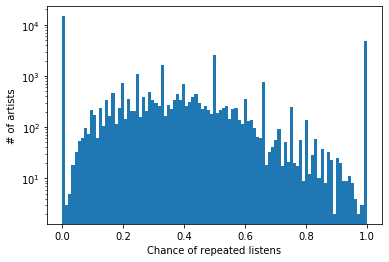

In [44]:
chance_bins = np.linspace(0,1,100)
sns.distplot(artist_replgroupby['repeat_play_chance'], bins=chance_bins, kde=False,
             hist_kws={"alpha": 1}) # , color = "grey"
plt.xlabel('Chance of repeated listens')
plt.ylabel('# of artists')
plt.yscale('log')

All artists have high chances of listens getting repeated.

In [45]:
artist_replgroupby['plays'].max()

303616

Text(0, 0.5, 'Chance of repeated listen')

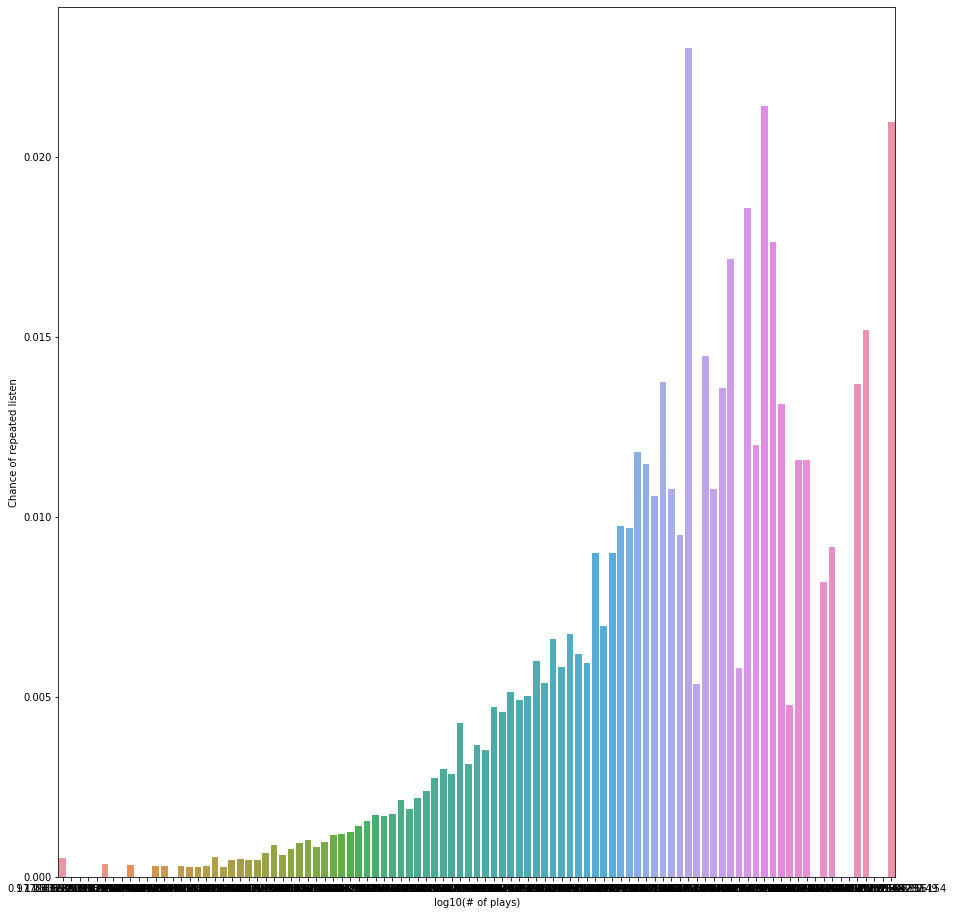

In [46]:
play_bins = np.logspace(-0.01, np.log10(artist_replgroupby['plays'].max()), 100)
play_labels = list(range(play_bins.shape[0]-1))
artist_replgroupby['play_cuts'] = pd.cut(artist_replgroupby['plays'],
                                         bins=play_bins, labels=play_labels)

y_repeat_chance_p = []
y_plays_p = []
for i in play_labels:
    playcut_i = artist_replgroupby[artist_replgroupby['play_cuts']==i]
    # print(playcut_i.columns)
    count = artist_replgroupby['plays'].sum()
    y_plays_p.append(count)
    if count != 0:
        y_repeat_chance_p.append(playcut_i['repeat_events'].sum() / count)
    else:
        y_repeat_chance_p.append(0)
    
fig = plt.figure(figsize=(15, 16)) 

ax111 = plt.subplot(1,1,1)
sns.barplot(x=play_bins[play_labels],y=y_repeat_chance_p)
ax111.set_xlabel('log10(# of plays)')
ax111.set_ylabel('Chance of repeated listen')

Based on the no. of plays the chance of getting repeated is higher. Still there is noise when the count increases.

1. no. of genres a song has
2. no. of composers and lyricists a song has
3. no. of plays a song has
4. no. of tracks a song artist has
4. song language
5. no. of plays a song artist has
6. no. of languages an artist has exposure to
7. song length
8. What to do if a song has an unmentioned genre in the test dataset?


In [47]:
data_song.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359914 entries, 0 to 359913
Data columns (total 14 columns):
song_id               359914 non-null object
repeat_play_chance    359914 non-null float64
plays                 359914 non-null int64
song_length           359914 non-null int64
genre_ids             352681 non-null object
artist_name           359914 non-null object
composer              204412 non-null object
lyricist              91206 non-null object
language              359913 non-null float64
repeat_event          359914 non-null float64
no_of_genres          359914 non-null int64
no_of_composers       359914 non-null int64
no_of_lyrics          359914 non-null int64
time_cuts             359913 non-null category
dtypes: category(1), float64(3), int64(5), object(5)
memory usage: 48.8+ MB


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                int64
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [49]:
train_newMerge = train[['msno', 'song_id']].merge(data_song[['song_id', 'song_length', 'no_of_genres', 'no_of_composers', 'no_of_lyrics', 'language', 'plays']], how="left", on='song_id');
# print(train.keys)
# print('--------- END ---------')
# print(data_song.keys)
train_newMerge.head(10)


,msno,song_id,song_length,no_of_genres,no_of_composers,no_of_lyrics,language,plays
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,206471.0,1.0,2.0,1.0,52.0,215.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,284584.0,1.0,1.0,1.0,52.0,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,225396.0,1.0,1.0,1.0,52.0,4.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,255512.0,1.0,1.0,1.0,-1.0,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,187802.0,1.0,3.0,1.0,52.0,412.0
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,247803.0,1.0,2.0,1.0,52.0,1108.0
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,229982.0,1.0,3.0,2.0,31.0,3869.0
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,181115.0,1.0,3.0,1.0,52.0,287.0
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,278964.0,1.0,1.0,1.0,52.0,31.0
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,257369.0,1.0,1.0,1.0,52.0,738.0


In [50]:
train_newMerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 8 columns):
msno               object
song_id            object
song_length        float64
no_of_genres       float64
no_of_composers    float64
no_of_lyrics       float64
language           float64
plays              float64
dtypes: float64(6), object(2)
memory usage: 506.6+ MB


There are 7377304 entries in train_newMerged - whereas there are 7377418 entries in the original train data set.
How are we supposed to add back those un-added entries and fill in the NaN??

In [51]:
xTest = test[['msno', 'song_id']].merge(data_song[['song_id', 'song_length', 'no_of_genres', 'no_of_composers', 'no_of_lyrics', 'language', 'plays']], how="left", on='song_id')

xTest.head(10)

,msno,song_id,song_length,no_of_genres,no_of_composers,no_of_lyrics,language,plays
0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,224130.0,1.0,1.0,1.0,3.0,694.0
1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,320470.0,1.0,1.0,1.0,3.0,6090.0
2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,315899.0,1.0,1.0,1.0,17.0,5.0
3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,285210.0,1.0,4.0,1.0,52.0,31.0
4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,197590.0,1.0,1.0,1.0,-1.0,5.0
5,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,NV3nhEcMqsawwvSNTUAt9IVAexHLOm0lDfrHyEfN5B0=,216372.0,1.0,1.0,1.0,31.0,81.0
6,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,DPM6G9RB5QO2dvAVPyc70gxHdvu872IjTUvV6LJT8ho=,200306.0,1.0,1.0,1.0,31.0,90.0
7,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,JGXB3PHc0CX0JskwwjmYP8i318BLo7DhChgEj6Yqjt8=,344305.0,1.0,1.0,1.0,3.0,1053.0
8,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,507plIkmke1jh3wMrHqKore82pPFozADwydR8P0Gx2Q=,289332.0,1.0,1.0,1.0,3.0,848.0
9,3ZQ6oGfcSiUoCrtBPKGa8hHCiFh5jqtDqPVDUl/zrjU=,HsgJXv1C7iVZiP7CWwWTfsmMhia6Huc0MUccfj+D02o=,232176.0,1.0,1.0,1.0,31.0,2381.0


In [52]:
xTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556790 entries, 0 to 2556789
Data columns (total 8 columns):
msno               object
song_id            object
song_length        float64
no_of_genres       float64
no_of_composers    float64
no_of_lyrics       float64
language           float64
plays              float64
dtypes: float64(6), object(2)
memory usage: 175.6+ MB


there are 2556790 entries in test data set.
And, there are 2236649 entries in xTest which has the necessary models to classify our dataset.
How can we address these NaNs?

In [53]:
xTest.fillna(99.0, inplace=True)

xTest.isnull().values.any()

False

In [54]:
xTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556790 entries, 0 to 2556789
Data columns (total 8 columns):
msno               object
song_id            object
song_length        float64
no_of_genres       float64
no_of_composers    float64
no_of_lyrics       float64
language           float64
plays              float64
dtypes: float64(6), object(2)
memory usage: 175.6+ MB


In [55]:
x = train_newMerge[['song_length', 'no_of_genres', 'no_of_composers', 'no_of_lyrics', 'language', 'plays']]
y = train['target']

In [56]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
song_length        float64
no_of_genres       float64
no_of_composers    float64
no_of_lyrics       float64
language           float64
plays              float64
dtypes: float64(6)
memory usage: 394.0 MB


In [57]:
x.head()

,song_length,no_of_genres,no_of_composers,no_of_lyrics,language,plays
0,206471.0,1.0,2.0,1.0,52.0,215.0
1,284584.0,1.0,1.0,1.0,52.0,1.0
2,225396.0,1.0,1.0,1.0,52.0,4.0
3,255512.0,1.0,1.0,1.0,-1.0,1.0
4,187802.0,1.0,3.0,1.0,52.0,412.0


In [58]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

y.info() ---> is not possible because its a series and not a DataFrame

Now, put some garbage value for the NaN's in the test data set before further processing of the model in the Machine Learning.

In [59]:
x.fillna(99.0, inplace = True)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
song_length        float64
no_of_genres       float64
no_of_composers    float64
no_of_lyrics       float64
language           float64
plays              float64
dtypes: float64(6)
memory usage: 394.0 MB


D:\My_En-Soft\Anaconda\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [60]:
x.describe()

,song_length,no_of_genres,no_of_composers,no_of_lyrics,language,plays
count,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06,7.377418e+06
mean,2.451172e+05,1.054924e+00,1.539425e+00,1.207523e+00,1.861096e+01,1.640925e+03
std,6.735108e+04,4.665745e-01,1.441689e+00,9.436797e-01,2.117969e+01,2.576840e+03
min,9.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+00
25%,2.147260e+05,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,7.000000e+01
50%,2.418120e+05,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,4.670000e+02
75%,2.721600e+05,1.000000e+00,1.000000e+00,1.000000e+00,5.200000e+01,1.893000e+03
max,1.085171e+07,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,1.397300e+04


In [61]:
x.isnull().values.any()

False

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [64]:
# Applying logistic regression to a test train split to check the model effeciency 
lgs = LogisticRegression();

cv_scores = cross_val_score(lgs, x, y, cv=5)

# x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
# lgs.fit(x_train, y_train);
# y_predicted = lgs.predict(x_test)

print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

D:\My_En-Soft\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\My_En-Soft\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\My_En-Soft\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\My_En-Soft\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\My_En-Soft\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

[0.57338367 0.5632301  0.55784513 0.55733411 0.5546394 ]
Average 5-Fold CV Score: 0.5612864790719468


In [67]:
print(xTest.info())
xTest_model = xTest[['song_length', 'no_of_genres', 'no_of_composers', 'no_of_lyrics', 'language', 'plays']]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556790 entries, 0 to 2556789
Data columns (total 8 columns):
msno               object
song_id            object
song_length        float64
no_of_genres       float64
no_of_composers    float64
no_of_lyrics       float64
language           float64
plays              float64
dtypes: float64(6), object(2)
memory usage: 175.6+ MB
None


In [ ]:
lgs.fit(x, y);

y1 = lgs.predict(xTest_model)

In [ ]:
result = pd.DataFrame({
    'target':y1
})

================= ONLY FOR KAGGLE SCORING PURPOSE =================

In [ ]:
result.index.name = 'id'
result.head()

In [ ]:
result.info()

In [ ]:
result.to_csv("music_recomm_result.csv", index=True)

music_recomm_result.csv | a few seconds ago | 0 seconds | 16 seconds | 0.54017

In [65]:
c_space = np.logspace(-5, 3, 11)
param_grid = {'C': c_space}
logreg_cv = GridSearchCV(lgs, param_grid, cv=5)
logreg_cv.fit(x, y)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

D:\My_En-Soft\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\My_En-Soft\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\My_En-Soft\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\My_En-Soft\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\My_En-Soft\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

D:\My_En-Soft\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\My_En-Soft\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\My_En-Soft\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\My_En-Soft\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\My_En-Soft\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

Tuned Logistic Regression Parameters: {'C': 0.00039810717055349735}
Best score is 0.5614040034060698


In [69]:
y1 = logreg_cv.predict_proba(xTest_model)
print(y1)

[[0.51276849 0.48723151]
 [0.36172449 0.63827551]
 [0.55440922 0.44559078]
 ...
 [0.51705341 0.48294659]
 [0.50774626 0.49225374]
 [0.50774626 0.49225374]]


In [75]:
print(type(y1))

<class 'numpy.ndarray'>


In [94]:
df_y1 = pd.DataFrame(y1)
df_y1.index.name = 'pindex'
df_y1.head()
df_y1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 2 columns):
0    float64
1    float64
dtypes: float64(2)
memory usage: 39.0 MB


In [93]:
xTest_model.index.name = 'pindex'
xTest_model.head()

,song_length,no_of_genres,no_of_composers,no_of_lyrics,language,plays
pindex,,,,,,
0,224130.0,1.0,1.0,1.0,3.0,694.0
1,320470.0,1.0,1.0,1.0,3.0,6090.0
2,315899.0,1.0,1.0,1.0,17.0,5.0
3,285210.0,1.0,4.0,1.0,52.0,31.0
4,197590.0,1.0,1.0,1.0,-1.0,5.0


In [95]:
df_y1 = xTest_model[['song_length', 'no_of_genres', 'no_of_composers' , 'no_of_lyrics', 'language','plays']].merge(df_y1[[0,1]], how="inner", on='pindex')
df_y1.head()

,song_length,no_of_genres,no_of_composers,no_of_lyrics,language,plays,0,1
pindex,,,,,,,,
0,224130.0,1.0,1.0,1.0,3.0,694.0,0.512768,0.487232
1,320470.0,1.0,1.0,1.0,3.0,6090.0,0.361724,0.638276
2,315899.0,1.0,1.0,1.0,17.0,5.0,0.554409,0.445591
3,285210.0,1.0,4.0,1.0,52.0,31.0,0.564148,0.435852
4,197590.0,1.0,1.0,1.0,-1.0,5.0,0.528494,0.471506


In [96]:
xTest.index.name='pindex'
xTest.head()

,msno,song_id,song_length,no_of_genres,no_of_composers,no_of_lyrics,language,plays
pindex,,,,,,,,
0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,224130.0,1.0,1.0,1.0,3.0,694.0
1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,320470.0,1.0,1.0,1.0,3.0,6090.0
2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,315899.0,1.0,1.0,1.0,17.0,5.0
3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,285210.0,1.0,4.0,1.0,52.0,31.0
4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,197590.0,1.0,1.0,1.0,-1.0,5.0


In [97]:
xTest = xTest.merge(df_y1[[1]], how='inner', on='pindex')

In [98]:
xTest.head()

,msno,song_id,song_length,no_of_genres,no_of_composers,no_of_lyrics,language,plays,1
pindex,,,,,,,,,
0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,224130.0,1.0,1.0,1.0,3.0,694.0,0.487232
1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,320470.0,1.0,1.0,1.0,3.0,6090.0,0.638276
2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,315899.0,1.0,1.0,1.0,17.0,5.0,0.445591
3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,285210.0,1.0,4.0,1.0,52.0,31.0,0.435852
4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,197590.0,1.0,1.0,1.0,-1.0,5.0,0.471506


In [99]:
xTest = xTest.sort_values(by=1, ascending=False)
xTest.head()

,msno,song_id,song_length,no_of_genres,no_of_composers,no_of_lyrics,language,plays,1
pindex,,,,,,,,,
1378480,R3VAsMHxKibd46ACtx6vVEmN4gNIAOs7mRalVHIho7w=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,219324.0,1.0,1.0,1.0,3.0,13973.0,0.834278
1796942,/NFF/7qwFrdFiyr+o3GDuK+MXaz7UMb0Aa3frlhLiU4=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,219324.0,1.0,1.0,1.0,3.0,13973.0,0.834278
1926995,LrVSB7vLAHNX1Zcp6RsFs6UEG2ktanOSCTueGzeEhek=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,219324.0,1.0,1.0,1.0,3.0,13973.0,0.834278
1218245,zTIHczpXOXWVt1yTtR2nOYt2RXmpb0fZZ7bFM+GwxYk=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,219324.0,1.0,1.0,1.0,3.0,13973.0,0.834278
2163086,aJsxRu0C96mgle7WtAegY2HLPUqxOXvNUn+G9rDC3BM=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,219324.0,1.0,1.0,1.0,3.0,13973.0,0.834278


The above obtained is the values sorted in descending order of Probability of song re-occurance.
Based on the above obtained value we can build the Front-end systems that will recommend the songs that have the highest probability to be heard again, thereby increasing the user app usage time.